**Import Packages**

In [0]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)           # To display all the data in each column
pd.options.display.max_columns = 100                # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

import sys
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

**Load Car Sales DataSet**

In [35]:
# import Car Sales Dataset 

df_csd = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv', encoding='latin-1')
df_csd.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [36]:
df_csd.shape

(9576, 10)

In [37]:
df_csd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   price         9576 non-null   float64
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   int64  
 4   engV          9142 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         9065 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


In [38]:
df_csd.describe()

,price,mileage,engV,year
count,9576.000000,9576.000000,9142.000000,9576.000000
mean,15633.317316,138.862364,2.646344,2006.605994
std,24106.523436,98.629754,5.927699,7.067924
min,0.000000,0.000000,0.100000,1953.000000
25%,4999.000000,70.000000,1.600000,2004.000000
50%,9200.000000,128.000000,2.000000,2008.000000
75%,16700.000000,194.000000,2.500000,2012.000000
max,547800.000000,999.000000,99.990000,2016.000000


In [39]:
# To install pandas profiling please run this command.

!pip install pandas-profiling --upgrade
import pandas_profiling
df_csd.profile_report(title='Pandas Profiling before Data Preprocessing')

Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.6/dist-packages (2.8.0)


In [43]:
df_csd_dup = df_csd.loc[(df_csd.duplicated(keep='first') == True)]
print ("Number of Duplicate columns :"              )
df_csd_dup.count()

Number of Duplicate columns :


car             113
price           113
body            113
mileage         113
engV            113
engType         113
registration    113
year            113
model           113
drive           112
dtype: int64

In [44]:
df_csd_nondup = df_csd.loc[(df_csd.duplicated(keep='first') == False)]
print ("Number of Non-Duplicate columns :" )
df_csd_nondup.count()

Number of Non-Duplicate columns :


car             9463
price           9463
body            9463
mileage         9463
engV            9029
engType         9463
registration    9463
year            9463
model           9463
drive           8953
dtype: int64

In [46]:
df_csd_nondup[df_csd_nondup.price == 0]

,car,price,body,mileage,engV,engType,registration,year,model,drive
20,Land Rover,0.0,crossover,0,4.4,Diesel,yes,2016,Range Rover,full
53,Mercedes-Benz,0.0,crossover,0,3.0,Diesel,yes,2016,GLE-Class,full
71,Toyota,0.0,crossover,0,4.5,Diesel,yes,2016,Land Cruiser 200,full
90,Porsche,0.0,sedan,22,4.8,Petrol,yes,2014,Panamera,full
92,Audi,0.0,crossover,0,3.0,Diesel,yes,2015,Q7,full
...,...,...,...,...,...,...,...,...,...,...
9019,Toyota,0.0,hatch,76,1.0,Petrol,yes,2007,Aygo,front
9025,Mercedes-Benz,0.0,crossover,1,3.0,Petrol,yes,2016,GLE-Class,full
9036,Ford,0.0,other,1,5.0,Petrol,yes,2014,Mustang,rear
9442,Renault,0.0,vagon,137,1.9,Diesel,yes,2008,Kangoo ïàññ.,front


In [49]:
df_csd_nondup['car'].value_counts().head()

Volkswagen       927
Mercedes-Benz    885
BMW              684
Toyota           529
VAZ              488
Name: car, dtype: int64

In [54]:
df_csd_nondup['car'].nunique()

87

In [0]:
#if the count of cars per brand is < 200, consider it as 'other' and assign it to a new column 'car_new'

def car_category(vcar):
    df = df_csd_nondup.loc[df_csd_nondup['car'] == vcar].count().car
    if df < 200:
        return 'other'
    else: 
        return vcar

df_csd_nondup['car_new'] = df_csd_nondup['car'].apply(car_category)

In [74]:
df_csd_nondup['car_new'].unique()

array(['Ford', 'Mercedes-Benz', 'Nissan', 'Honda', 'Renault', 'BMW',
       'other', 'Volkswagen', 'Audi', 'Mitsubishi', 'Kia', 'Toyota',
       'Hyundai', 'Opel', 'Chevrolet', 'Skoda', 'Daewoo', 'VAZ'],
      dtype=object)

In [76]:
df_csd_nondup.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           510
cars_newcat       0
car_new           0
dtype: int64

In [77]:
df_csd_nondup['drive'].mode()[0]

'front'

In [0]:
df_csd_nondup['drive_new'] = df_csd_nondup['drive']

In [0]:
df_csd_nondup['drive_new'].fillna(df_csd_nondup['drive'].mode()[0], inplace = True)

In [82]:
df_csd_nondup['engV'].mode()[0]

2.0

In [0]:
df_csd_nondup['engV_new'] = df_csd_nondup['engV']

In [0]:
df_csd_nondup['engV_new'].fillna(df_csd_nondup['engV'].mode()[0], inplace = True)

In [85]:
df_csd_nondup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9463 entries, 0 to 9575
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9463 non-null   object 
 1   price         9463 non-null   float64
 2   body          9463 non-null   object 
 3   mileage       9463 non-null   int64  
 4   engV          9029 non-null   float64
 5   engType       9463 non-null   object 
 6   registration  9463 non-null   object 
 7   year          9463 non-null   int64  
 8   model         9463 non-null   object 
 9   drive         8953 non-null   object 
 10  cars_newcat   9463 non-null   object 
 11  car_new       9463 non-null   object 
 12  drive_new     9463 non-null   object 
 13  engV_new      9463 non-null   float64
dtypes: float64(3), int64(2), object(9)
memory usage: 1.4+ MB


In [0]:
df_csd_nondup.drop('car', axis =1, inplace = True)

In [0]:
df_csd_nondup.drop('engV', axis =1, inplace = True)

In [0]:
df_csd_nondup.drop('drive', axis =1, inplace = True)

In [0]:
df_csd_nondup.drop('cars_newcat', axis =1, inplace = True)

In [0]:
#As price has a highest co-relation with year, lets replace zeroes with the mean of price grouped by car,year,engType,drive_new

def price_clean(vcar,vyear,vengtype,vdrive, vprice):
    if vprice == 0:
        df = df_csd_nondup.loc[(df_csd_nondup['car_new'] == vcar) \
                         & (df_csd_nondup['year'] == vyear) \
                            & (df_csd_nondup['engType'] == vengtype) \
                               & (df_csd_nondup['drive_new'] == vdrive)].price.mean()
        return df
    else: 
        return vprice
    
df_csd_nondup['price_new'] = df_csd_nondup.apply(lambda x: price_clean(x['car_new'], x['year'],x['engType'],x['drive_new'], x['price']), axis=1)

In [0]:
# dropping price column to avoid rejected in analysis as it created a strong co-relation
df_csd_nondup.drop('price', axis=1, inplace=True)

In [111]:
df_csd_nondup.head()

,body,engType,registration,year,model,car_new,drive_new,engV_new,price_new,mileage_new
0,crossover,Gas,yes,2010,Kuga,Ford,full,2.5,15500.0,68.0
1,sedan,Gas,yes,2011,E-Class,Mercedes-Benz,rear,1.8,20500.0,173.0
2,other,Petrol,yes,2008,CL 550,Mercedes-Benz,rear,5.5,35000.0,135.0
3,van,Diesel,yes,2012,B 180,Mercedes-Benz,front,1.8,17800.0,162.0
4,vagon,Other,yes,2013,E-Class,Mercedes-Benz,front,2.0,33000.0,91.0


In [112]:
df_csd_nondup[df_csd_nondup['mileage_new'] ==0] .count()

body            0
engType         0
registration    0
year            0
model           0
car_new         0
drive_new       0
engV_new        0
price_new       0
mileage_new     0
dtype: int64

In [113]:
df_csd_nondup.isnull().count()

body            9463
engType         9463
registration    9463
year            9463
model           9463
car_new         9463
drive_new       9463
engV_new        9463
price_new       9463
mileage_new     9463
dtype: int64

Text(0.5, 1.0, 'Top 10 Cars Data')

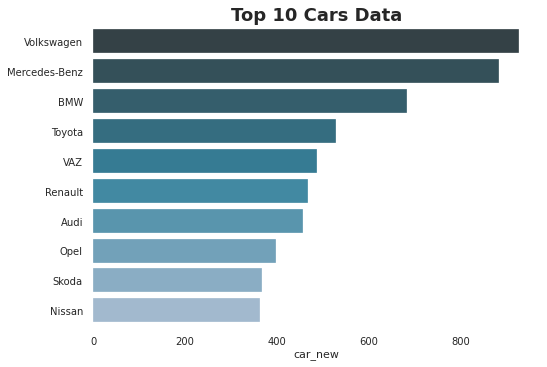

In [122]:
car_data = df_csd_nondup[df_csd_nondup['car_new'] != 'other']
top10_cars =  car_data['car_new'].value_counts()[:10].to_frame()

sns.barplot(top10_cars['car_new'], top10_cars.index,palette="PuBuGn_d")

plt.title('Top 10 Cars Data',fontsize=18,fontweight="bold")

**Price Comparison of Top 3 brands having price till 50000 USD and Price have taken till this range to avoid outliers and its giving normal price distribution all amoung those three brands.**

Text(0.5, 1.0, 'Price distribution using FacetGrid')

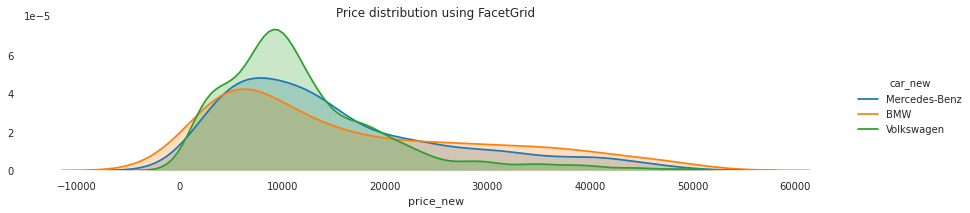

In [131]:
TopBrands = df_csd_nondup[(df_csd_nondup['car_new'].isin (['Mercedes-Benz','Volkswagen', 'BMW'])) & (df_csd_nondup['price_new'] < 50000) ]  

as_fig = sns.FacetGrid(TopBrands,hue='car_new',aspect=4)
as_fig.map(sns.kdeplot,'price_new',shade=True)

as_fig.add_legend()

plt.title('Price distribution using FacetGrid')

**MIleage Distribution over Distance travelled by these cars less than 400k kms and comparsion between three top brands.**

Text(0.5, 1.0, 'Mileage distribution using FacetGrid')

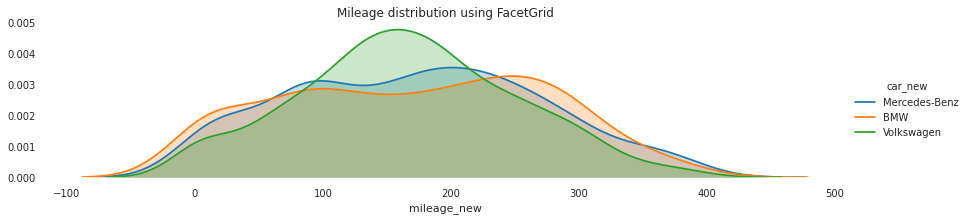

In [134]:
TopBrands = df_csd_nondup[(df_csd_nondup['car_new'].isin (['Mercedes-Benz','Volkswagen', 'BMW'])) & (df_csd_nondup['mileage_new'] < 400   ) ]  

as_fig = sns.FacetGrid(TopBrands,hue='car_new',aspect=4)
as_fig.map(sns.kdeplot,'mileage_new',shade=True)

as_fig.add_legend()

plt.title('Mileage distribution using FacetGrid')

**Pie-Chart Representation on Car's body design, Engine type & on its Drive type**

In [135]:
df_csd_nondup['body'].nunique()

6

In [136]:
df_csd_nondup['drive_new'].nunique()

3

In [137]:
df_csd_nondup['engType'].nunique()

4

Text(0.5, 1.0, 'Engine Type')

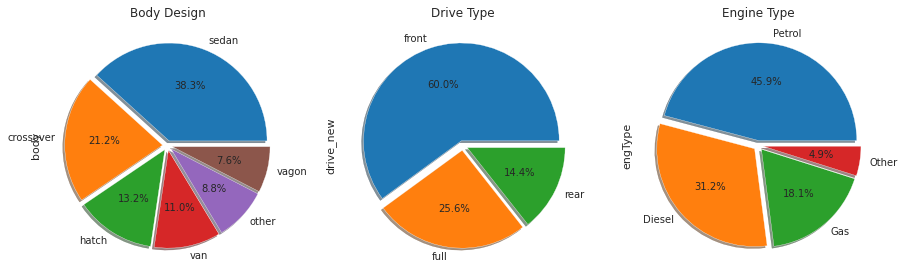

In [144]:
f,ax = plt.subplots(1,3,figsize=(15,4.5))

df_csd_nondup['body'].value_counts().plot.pie(explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05), autopct='%1.1f%%', shadow=True, ax=ax[0])
df_csd_nondup['drive_new'].value_counts().plot.pie(explode = (0.05, 0.05, 0.05), autopct='%1.1f%%', shadow=True, ax=ax[1])
df_csd_nondup['engType'].value_counts().plot.pie(explode = (0.05, 0.05, 0.05, 0.05), autopct='%1.1f%%', shadow=True, ax=ax[2])
ax[0].set_title('Body Design')
ax[1].set_title('Drive Type')
ax[2].set_title('Engine Type')

**Most Sold Cars whose percentage is high those are Sedan cars with front drive type and having petrol variant.**

**Bar plots Representation of Body Design, Drive type with its Variant as represented in Pie-chart(%age).**

Text(0.5, 1.0, '[EngType].')

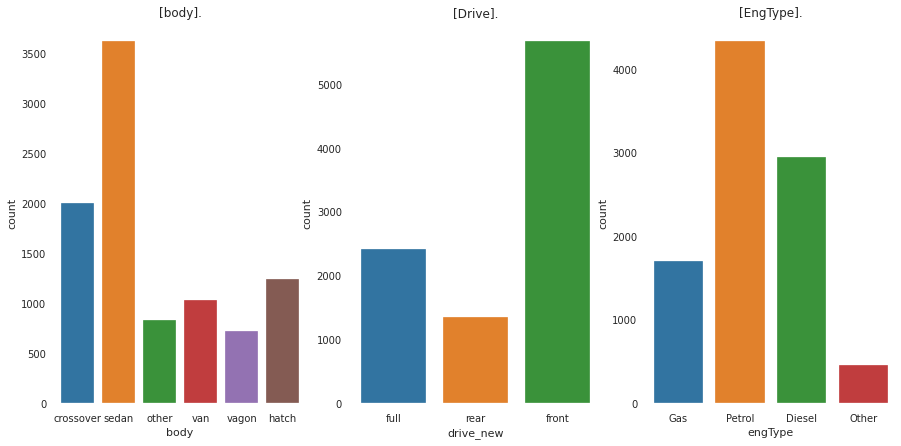

In [145]:
fig, ax = plt.subplots(ncols=3, figsize=(15,7))
sns.set_style('whitegrid')
sns.countplot(x='body', data=df_csd_nondup,ax = ax[0]).set_title('[body].')
sns.countplot(x='drive_new', data=df_csd_nondup,ax = ax[1]).set_title('[Drive].')
sns.countplot(x='engType', data=df_csd_nondup,ax = ax[2]).set_title('[EngType].')

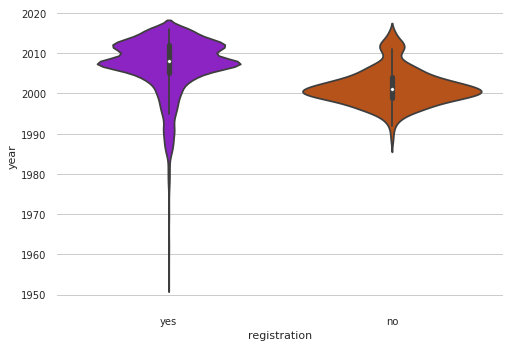

In [153]:
ax = sns.violinplot(x="registration", y="year", palette="gnuplot", data=df_csd_nondup)
#plt.xlabel("If they go for treatment or not?")
#plt.ylabel("AgeGroup")
#plt.title("Age Category Vs. Seeking Treatment", fontsize=18, fontweight = "bold")

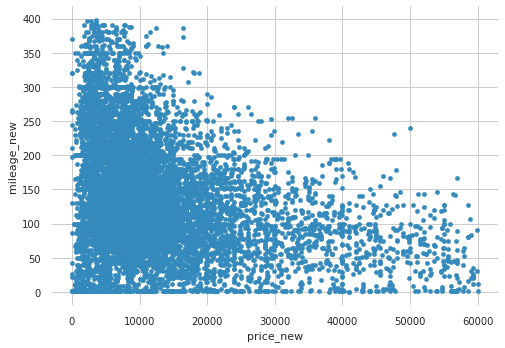

In [155]:
df_csd_nondup[(df_csd_nondup['price_new'] < 60000) & (df_csd_nondup['mileage_new'] < 400)].plot.scatter(x='price_new', y='mileage_new')

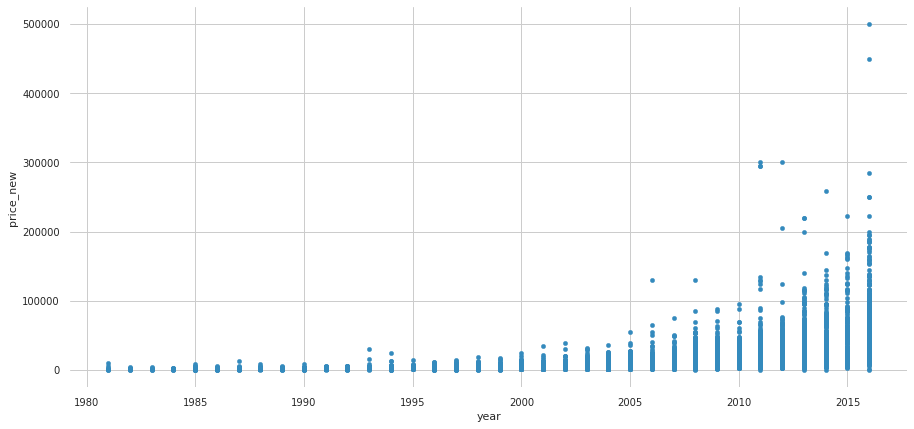

In [168]:
df_csd_nondup[(df_csd_nondup['price_new'] < 500000) & (df_csd_nondup['year']> 1980)].plot.scatter(x='year', y='price_new', figsize = (15, 7))

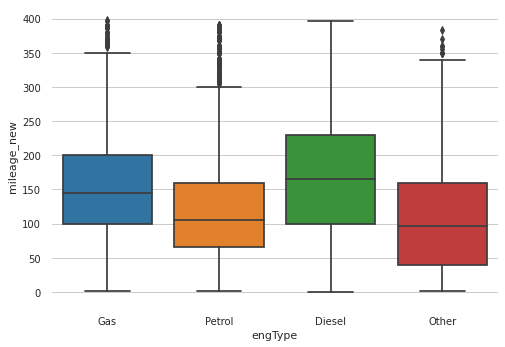

In [174]:
sns.boxplot(x='engType', y='mileage_new', data = df_csd_nondup[df_csd_nondup['mileage_new']<400])

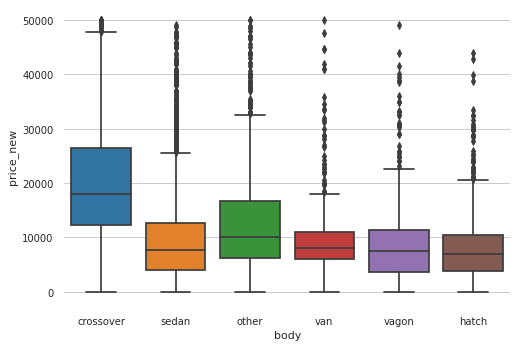

In [181]:
sns.boxplot(x='body', y='price_new', data=df_csd_nondup[df_csd_nondup['price_new'] < 50000 ])

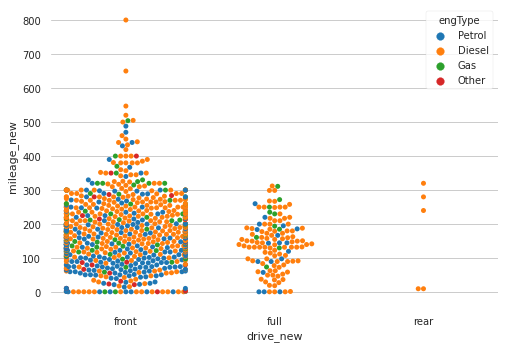

In [183]:
vcsd = df_csd_nondup[df_csd_nondup['car_new'] == 'Volkswagen']

sns.swarmplot(data= vcsd, x="drive_new", y="mileage_new", hue="engType")

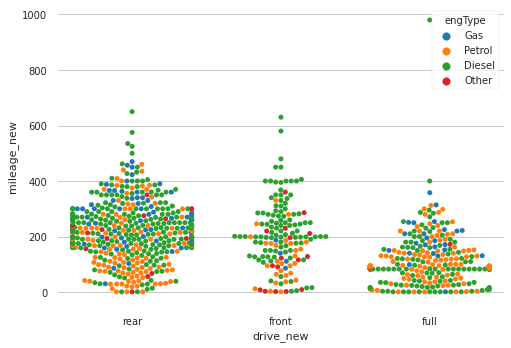

In [185]:
mbcsd = df_csd_nondup[df_csd_nondup['car_new'] == 'Mercedes-Benz']

sns.swarmplot(data= mbcsd, x="drive_new", y="mileage_new", hue="engType")

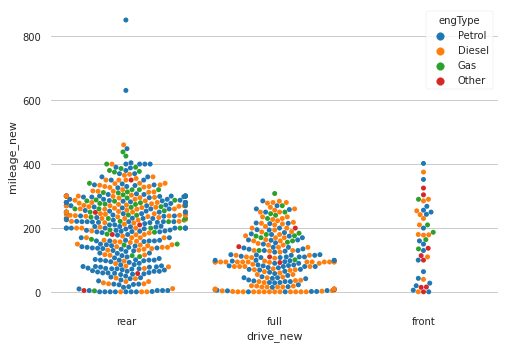

In [186]:
bcsd = df_csd_nondup[df_csd_nondup['car_new'] == 'BMW']

sns.swarmplot(data= bcsd, x="drive_new", y="mileage_new", hue="engType")

**Top 2 brand's Cars is having more mileage in Diesel Variant whereas BMW is almost equal in number of Petrol as well Diesel variant.**